In [1]:
! pip install -qq -U langchain youtube_transcript_api einops
! pip install -qq -U accelerate bitsandbytes xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.2/974.2 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.2 MB/s eta 0:00:00


In [2]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.2 MB/s eta 0:00:00


In [3]:
from IPython.display import YouTubeVideo

from langchain.document_loaders import YoutubeLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import LLMChain
from langchain.chains.summarize import load_summarize_chain
from langchain.llms import HuggingFacePipeline

from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

import torch

import langchain
print(langchain.__version__)

0.2.4


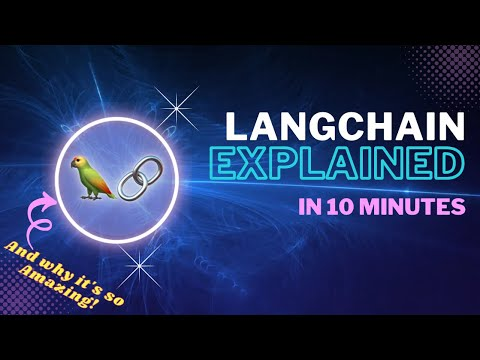

In [4]:
YouTubeVideo('Y_O-x-itHaU', width=700, height=500)

In [5]:
loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=Y_O-x-itHaU")
transcript = loader.load()

In [6]:
transcript

[Document(page_content="land chain is one of the hottest AI Frameworks right now with over 40 000 stars on GitHub as of this video let me help you understand some of the most important aspects of Lang chain and why it's such an amazing library to work with most of us have used chat GPT and are quite fascinated by its capabilities so you can add something like write in this style of Shakespeare how to cook pasta so what happens behind the scenes is that it takes your input and sends it to an AI system as a prompt and that generates a response which is provided back to you and often these systems are called large language models which are trained on a huge amount of text Data from the internet now I want you to imagine a scenario where you are an instructor and you want your students to use chat GPT and submit all of their assignments in the written style of Shakespeare so you can imagine that most of our students are prompting chat GPT to write in this style of Shakespeare and this is q

In [7]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=50)
texts = text_splitter.split_documents(transcript)

In [8]:
len(texts)

4

In [9]:
model_repo = 'h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2'

tokenizer = AutoTokenizer.from_pretrained(model_repo)

model = AutoModelForCausalLM.from_pretrained(model_repo,
                                             load_in_8bit=True,
                                             device_map='auto',
                                             torch_dtype=torch.float16,
                                             low_cpu_mem_usage=True,
                                             trust_remote_code=True
                                            )
max_len = 2048 # 1024
task = "text-generation"
T = 0

tokenizer_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/377 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

configuration_RW.py:   0%|          | 0.00/2.61k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2:
- configuration_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modelling_RW.py:   0%|          | 0.00/47.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/h2oai/h2ogpt-gm-oasst1-en-2048-falcon-7b-v2:
- modelling_RW.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [10]:
pipe = pipeline(
    task=task,
    model=model,
    tokenizer=tokenizer,
    max_length=max_len,
    temperature=T,
    top_p=0.95,
    repetition_penalty=1.15,
    pad_token_id = 11
)

llm = HuggingFacePipeline(pipeline=pipe)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [11]:
chain = load_summarize_chain(llm=llm, chain_type="map_reduce", verbose=True)

In [12]:
chain

MapReduceDocumentsChain(verbose=True, llm_chain=LLMChain(verbose=True, prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7cdb96717670>)), reduce_documents_chain=ReduceDocumentsChain(verbose=True, combine_documents_chain=StuffDocumentsChain(verbose=True, llm_chain=LLMChain(verbose=True, prompt=PromptTemplate(input_variables=['text'], template='Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'), llm=HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x7cdb96717670>)), document_variable_name='text')), document_variable_name='text')

In [15]:
### default prompt template
chain.llm_chain.prompt.template

'Write a concise summary of the following:\n\n\n"{text}"\n\n\nCONCISE SUMMARY:'